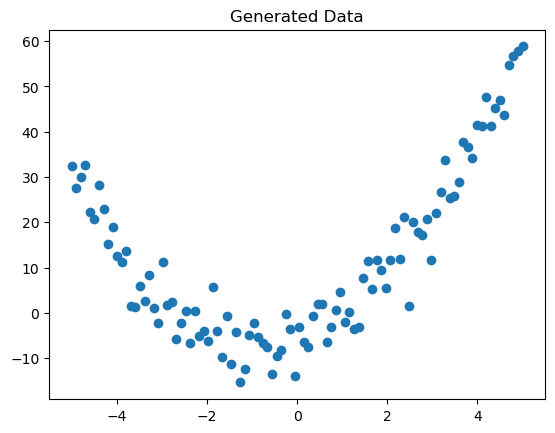

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x_data = np.linspace(-5, 5, 100)
y_data = 2 * x_data**2 + 3 * x_data - 5 + 5 * np.random.randn(100)

# Plot the data
plt.scatter(x_data, y_data)
plt.title('Generated Data')
plt.show()

In [2]:
# Define the polynomial
def polynomial(x, coeffs):
    """
    Compute the polynomial value given x and coefficients.
    E.g. For second-degree: f(x) = a*x^2 + b*x + c
    """
    n = len(coeffs)
    return sum([coeffs[i] * x**i for i in range(n)])

In [27]:
# Compute the L1 loss
def compute_loss(y_true, y_pred):
    return sum(abs(y_true - y_pred))

In [11]:
# Generate square Kronecker delta matrix
def kronecker_delta(n):
    kron = np.zeros((n,n))
    i = np.arange(n)
    kron[i,i] = 1
    return kron

In [39]:
# Compute the gradient of the L1 loss w.r.t polynomial coefficients
def compute_gradient(x_data, y_data, coeffs):
    n = len(coeffs)
    kron = kronecker_delta(n)
    epsilon = 1e-4

    # Implement the gradient calculation for L1 loss and the polynomial
    return np.array([compute_loss(y_data, polynomial(x_data, coeffs + kron[i]*epsilon)) for i in range(n)])

In [75]:
# Gradient Descent
def gradient_descent(x_data, y_data, learning_rate, num_epochs, poly_degree):
    # Initialize polynomial coefficients with random values
    coeffs = np.random.randn(poly_degree + 1)
    
    for epoch in range(num_epochs):
        # Compute the predicted values using the polynomial
        y_pred = polynomial(x_data, coeffs)
        
        # Compute the L1 loss
        loss = compute_loss(y_data, y_pred)
        
        # Compute the gradient
        grad = compute_gradient(x_data, y_data, coeffs) - loss
        
        # Update the coefficients using gradient descent
        coeffs -= grad * learning_rate
        
        # Print loss every 10 epochs
        if epoch % 1000 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')
    
    return coeffs


Epoch 0, Loss: 2123.356865906544
Epoch 1000, Loss: 443.11732173809827
Epoch 2000, Loss: 449.7726884674056
Epoch 3000, Loss: 449.7872612445201
Epoch 4000, Loss: 443.18877414910526
Epoch 5000, Loss: 449.71138272023086
Epoch 6000, Loss: 443.23009650458624
Epoch 7000, Loss: 451.4363835838008
Epoch 8000, Loss: 445.3143674863275
Epoch 9000, Loss: 447.33416631866356


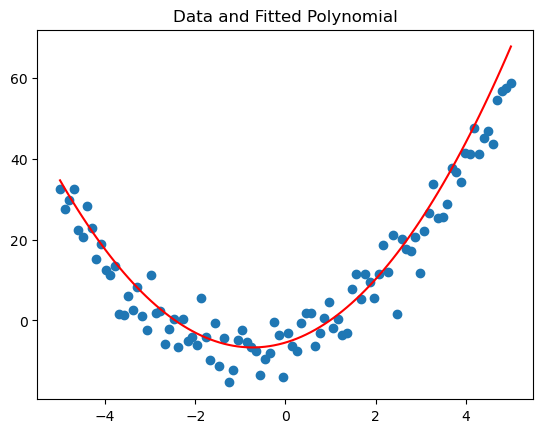

In [76]:
# Hyperparameters
learning_rate = 10
num_epochs = 10000
poly_degree = 2  # For a second-degree polynomial

# Optimize the polynomial coefficients
optimized_coeffs = gradient_descent(x_data, y_data, learning_rate, num_epochs, poly_degree)

# Plot the results
plt.scatter(x_data, y_data)
plt.plot(x_data, [polynomial(x, optimized_coeffs) for x in x_data], 'r')
plt.title('Data and Fitted Polynomial')
plt.show()